In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import onIsleme
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
train=pd.read_csv("SMS_train.csv") #unicode error hatasını encoding="cp1252" hiperparametresi ile çözebiliyoruz.

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 283: invalid start byte

In [39]:
train=pd.read_csv("SMS_train.csv",encoding='cp1252',index_col=0)
test=pd.read_csv("SMS_test.csv",encoding='cp1252',index_col=0)

In [40]:
train

,Message_body,Label
S. No.,,
1,Rofl. Its true to its name,Non-Spam
2,The guy did some bitching but I acted like i'd...,Non-Spam
3,"Pity, * was in mood for that. So...any other s...",Non-Spam
4,Will ü b going to esplanade fr home?,Non-Spam
5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
953,hows my favourite person today? r u workin har...,Non-Spam
954,How much you got for cleaning,Non-Spam
955,Sorry da. I gone mad so many pending works wha...,Non-Spam


In [41]:
test

,Message_body,Label
S. No.,,
1,"UpgrdCentre Orange customer, you may now claim...",Spam
2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
3,Congrats! Nokia 3650 video camera phone is you...,Spam
4,URGENT! Your Mobile number has been awarded wi...,Spam
5,Someone has contacted our dating service and e...,Spam
...,...,...
121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
122,Try to do something dear. You read something f...,Non-Spam
123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam


In [42]:
train["Clear Text"]=train["Message_body"].apply(onIsleme.preProcessing)
train["Clear Text"]=train["Clear Text"].apply(onIsleme.removeSpace)

train["Clear"]=[" ".join(wrd for wrd in x) for x in train["Clear Text"]]

#boş satırları silme
train_index=train[train["Clear Text"].str[0].isnull()].index
train=train.drop(train_index)
train=train.reset_index()
#del train[["level_0","index"]]

train.head()

,S. No.,Message_body,Label,Clear Text,Clear
0,1,Rofl. Its true to its name,Non-Spam,"[rofl, its, true, to, its, name]",rofl its true to its name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,"[the, guy, did, some, bitchingi, but, actedi, ...",the guy did some bitchingi but actedi lik id b...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,"[pity, was, in, moodu, for, that, soany, other...",pity was in moodu for that soany other suggest...
3,4,Will ü b going to esplanade fr home?,Non-Spam,"[will, goingi, to, esplana, fr, home]",will goingi to esplana fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,"[this, is, the, nd, we, have, triedi, contact,...",this is the nd we have triedi contact have won...


In [43]:
train

,S. No.,Message_body,Label,Clear Text,Clear
0,1,Rofl. Its true to its name,Non-Spam,"[rofl, its, true, to, its, name]",rofl its true to its name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,"[the, guy, did, some, bitchingi, but, actedi, ...",the guy did some bitchingi but actedi lik id b...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,"[pity, was, in, moodu, for, that, soany, other...",pity was in moodu for that soany other suggest...
3,4,Will ü b going to esplanade fr home?,Non-Spam,"[will, goingi, to, esplana, fr, home]",will goingi to esplana fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,"[this, is, the, nd, we, have, triedi, contact,...",this is the nd we have triedi contact have won...
...,...,...,...,...,...
950,953,hows my favourite person today? r u workin har...,Non-Spam,"[hows, my, favouri, perso, today, work, hard, ...",hows my favouri perso today work hard couldnt ...
951,954,How much you got for cleaning,Non-Spam,"[how, much, you, got, for, cleaningi]",how much you got for cleaningi
952,955,Sorry da. I gone mad so many pending works wha...,Non-Spam,"[sorry, da, gone, mad, so, many, pendingi, wor...",sorry da gone mad so many pendingi works what ...
953,956,Wat time ü finish?,Non-Spam,"[wat, finish]",wat finish


In [44]:
train.groupby("Label").size()

Label
Non-Spam    833
Spam        122
dtype: int64

In [46]:
test["Clear Text"]=test["Message_body"].apply(onIsleme.preProcessing)
test["Clear Text"]=test["Clear Text"].apply(onIsleme.removeSpace)

test["Clear"]=[" ".join(wrd for wrd in x) for x in test["Clear Text"]]

#boş satırları silme
test_index=test[test["Clear Text"].str[0].isnull()].index
test=test.drop(test_index)
test=test.reset_index()
#del train[["level_0","index"]]

test.head()

,S. No.,Message_body,Label,Clear Text,Clear
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,"[upgrdcentre, orange, customer, you, may, now,...",upgrdcentre orange customer you may now claim ...
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,"[loan, for, any, purpose, homeowners, tenants,...",loan for any purpose homeowners tenants welcom...
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,"[congrats, nokia, video, camer, phone, is, you...",congrats nokia video camer phone is your call ...
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,"[urgent, your, mobil, number, has, been, award...",urgent your mobil number has been awardedi wit...
4,5,Someone has contacted our dating service and e...,Spam,"[someon, has, contactedi, our, datingi, serviç...",someon has contactedi our datingi serviç and e...


In [49]:
X_train=train["Clear"]
X_test=test["Clear"]
y_train=train["Label"]
y_test=test["Label"]

In [50]:
svm=Pipeline([("Vect",TfidfVectorizer()),("SVM",LinearSVC())]).fit(X_train,y_train)

y_pred=svm.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.864

In [52]:
f1_score(y_test,y_pred,average="weighted")

0.8654892109500805

In [53]:
cm=confusion_matrix(y_test,y_pred)

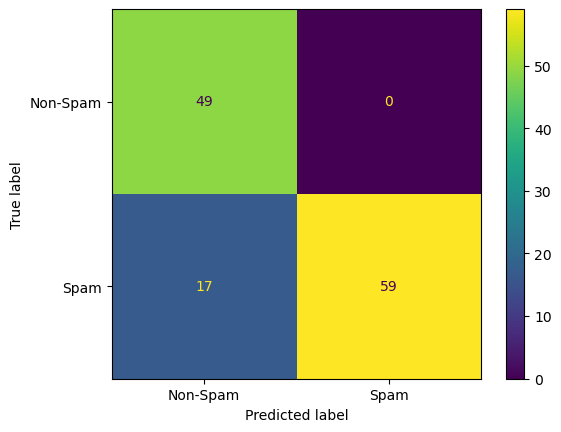

In [54]:
ConfusionMatrixDisplay(cm,display_labels=svm.classes_).plot();

In [69]:
# Modelin doğruluğunu kendimiz test edelim.

ornek=[""]

y_pred=svm.predict(ornek)

y_pred

array(['Non-Spam'], dtype=object)